# Customer Segmentation Using Unsupervised Learning


# Problem Statement

The mall has a diverse set of customers with different demographics and spending behaviors. Currently, all customers are treated the same, making it difficult to identify high-value customers, loyal shoppers, or price-sensitive buyers. This one-size-fits-all approach prevents the marketing team from designing targeted campaigns that maximize sales and customer satisfaction.

The goal is to analyze customer data from the Mall Customers Dataset and segment them into meaningful groups. These segments will help the marketing team design personalized strategies that fit the needs and preferences of each group.

**Objective:**

Cluster customers based on spending habits and propose marketing strategies tailored to each
segment.


**Dataset:** Mall Customers Dataset

**Dataset Description :**

The dataset contains demographic and spending information collected through customer membership cards. Each entry represents an individual customer with the following attributes:

CustomerID – Unique identifier for each customer.

Gender – Gender of the customer.

Age – Customer’s age in years.

Education – Educational background of the customer.

Marital Status – Marital status of the customer.

Annual Income – Customer’s yearly income.

Spending Score – A score assigned to the customer based on purchasing behavior and engagement with the mall.


# ● Conduct Exploratory Data Analysis (EDA)


In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load the dataset
df = pd.read_excel('/content/sample_data/Mall Customers.xlsx')
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [ ]:
#view shape
df.shape

(200, 7)

In [ ]:
#check data types and related information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [ ]:
#check missing values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Education,0
Marital Status,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
#summary of numerical features
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#Value counts for categorical variables
df[['Gender','Education ', 'Marital Status']].value_counts()

Gender  Education      Marital Status
F       Graduate       Married           20
M       Graduate       Married           16
F       Graduate       Single            13
        High School    Married           13
M       Uneducated     Married           12
        Unknown        Married           11
        Graduate       Single             9
F       Doctorate      Married            9
        Unknown        Married            9
M       High School    Married            7
                       Single             7
F       College        Single             6
        Uneducated     Married            6
                       Single             5
        Post-Graduate  Single             5
M       Uneducated     Single             5
F       High School    Unknown            5
        Graduate       Divorced           4
        High School    Single             4
M       College        Single             4
                       Married            4
F       Graduate       Unknown            4
        High School    Divorced           3
        Post-Graduate  Married            3
        College        Married            2
M       Unknown        Single             2
                       Unknown            2
        Uneducated     Unknown            2
        College        Divorced           1
F       Unknown        Divorced           1
M       Doctorate      Single             1
                       Divorced           1
        High School    Unknown            1
        Graduate       Unknown            1
        Uneducated     Divorced           1
        Unknown        Divorced           1
Name: count, dtype: int64

In [ ]:
#check dublicates
df.duplicated().sum()

np.int64(0)

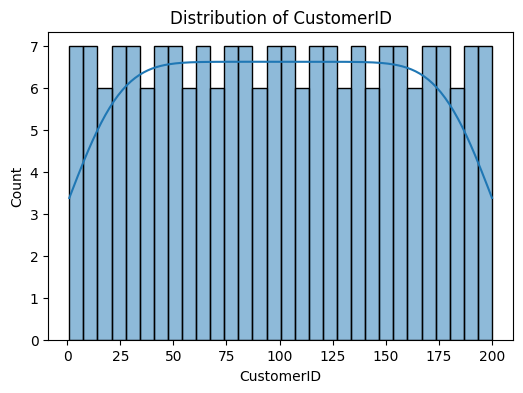

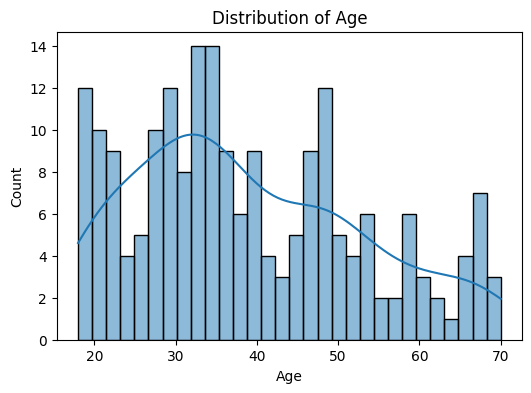

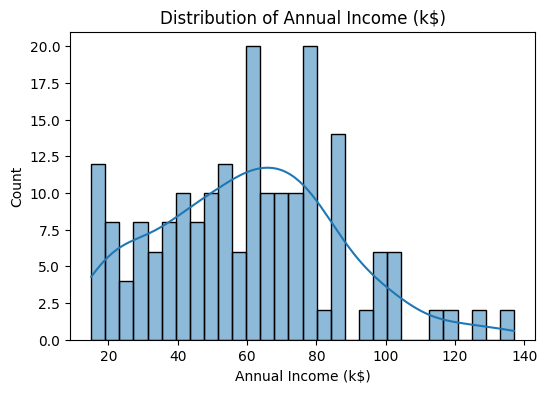

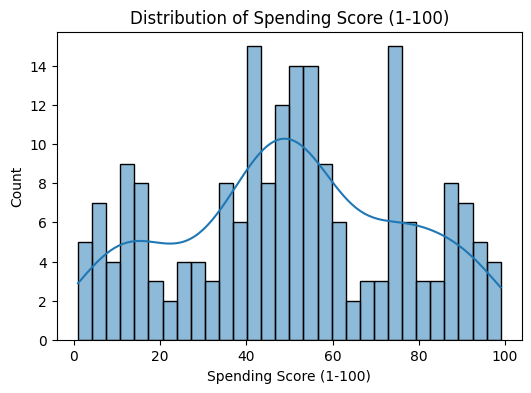

In [ ]:
# Histogram for numerical variables
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

**Conclusions from Histograms**

1. Age Distribution

The majority of customers are in the 18–22 and 30–35 age ranges, suggesting a strong presence of young adults and early middle-aged groups.

The number of customers decreases significantly for older age groups, especially 60–70, indicating that fewer older customers are part of this dataset.

2. Annual Income Distribution

Most customers have an annual income between 60k–80k $, making this the most common income range.

Very few customers earn above 120k $, meaning high-income customers are rare in the dataset.

3. Spending Score Distribution

A large proportion of customers have spending scores between 40–60, indicating that moderate spenders form the largest group.

Customers with very low scores (20–39) are less frequent, suggesting spending patterns are concentrated around the middle range.


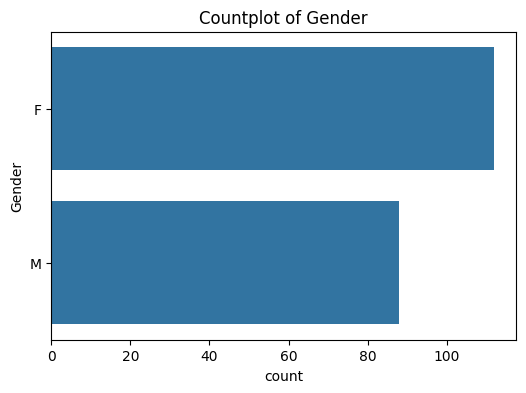

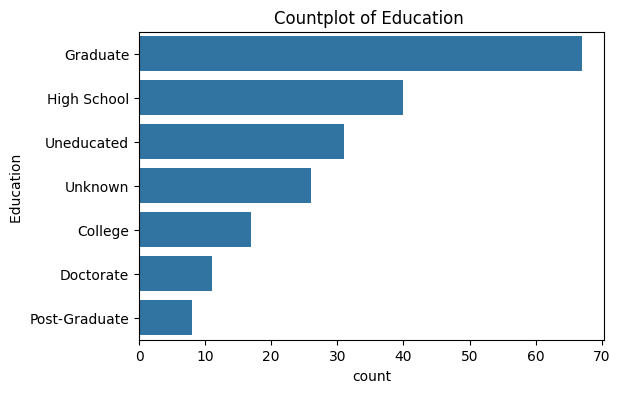

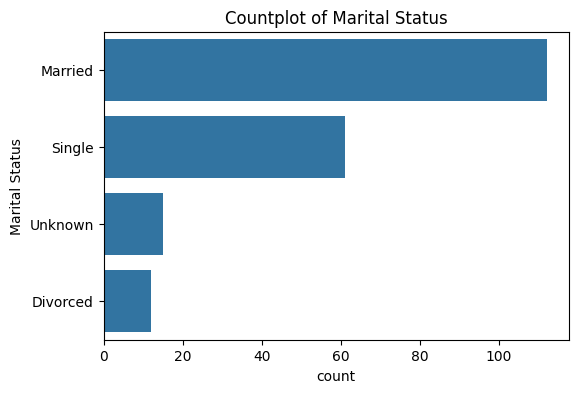

In [ ]:
#countplots for categorical variables
for col in df.select_dtypes(include="object").columns:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.show()

**Conclusion :**

1. Gender

The majority of the customers are female, indicating a higher representation of women in the dataset.

2. Education

Most customers are graduates, while the proportion of postgraduates is relatively low.

3. Marital Status

A significant number of customers are married, whereas divorced individuals form the smallest group.

🔹 Overall Insight:
The countplots indicate that the typical customer profile in this dataset is a female, graduate, and married individual.


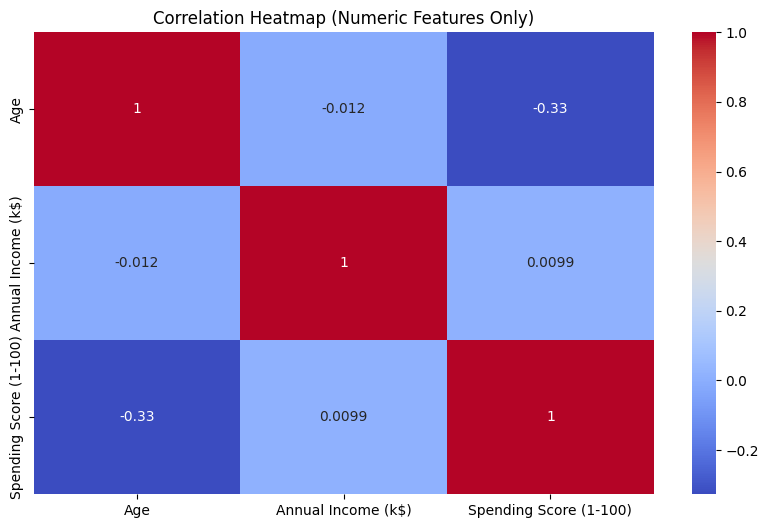

In [ ]:
numeric_df = df.select_dtypes(include=['number']).drop(columns=['CustomerID'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


**Conclusion :**

There is no strong correlation among the three variables.

The only noticeable relationship is that older customers tend to have lower spending scores.

Income and spending are not directly related, which means high-income customers are not necessarily high spenders

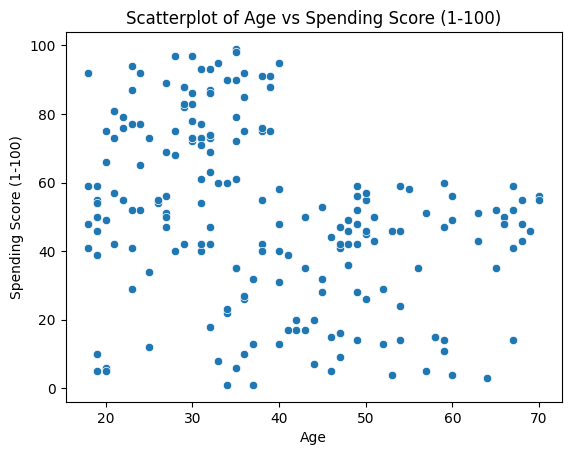

In [ ]:
# Scatterplot
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'])
plt.title("Scatterplot of Age vs Spending Score (1-100)")
plt.show()

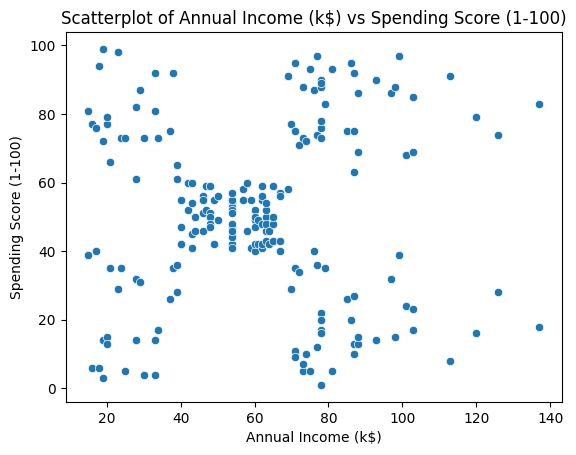

In [ ]:
# Scatterplot
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.title("Scatterplot of Annual Income (k$) vs Spending Score (1-100)")
plt.show()

# K-Means Clustering to segment customers


In [ ]:
#Data Preparation for Clustering
from sklearn.preprocessing import StandardScaler
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # example
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

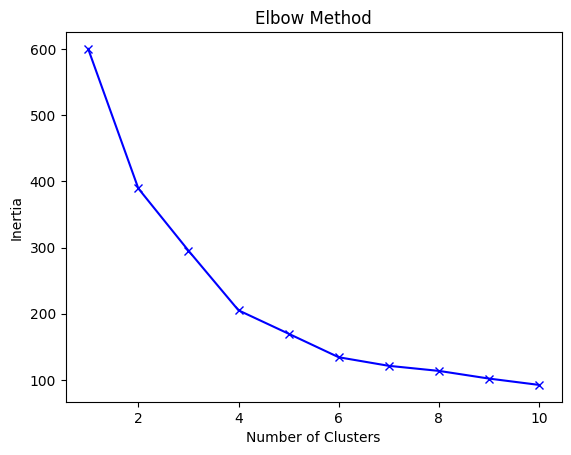

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



In [ ]:
# Apply KMeans with chosen k
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
#check cluster size
df['Cluster'].value_counts()

,count
Cluster,
0,45
3,40
1,39
4,30
2,25
5,21


In [ ]:
#profile each cluster

numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

cluster_profile = df.groupby('Cluster')[numeric_cols].mean()
print(cluster_profile)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        32.692308           86.538462               82.128205
2        25.560000           26.480000               76.240000
3        26.125000           59.425000               44.450000
4        44.000000           90.133333               17.933333
5        45.523810           26.285714               19.380952


**Interpretaions**:

Cluster 0 → Older (avg ~56), middle income, moderate spending.

Cluster 1 → Young adults (~33), high income, very high spending (your premium/high-value customers).

Cluster 2 → Very young (~25), low income, but high spending (price-sensitive, impulsive buyers).

Cluster 3 → Young (~26), medium income, moderate spending (average customers).

Cluster 4 → Middle-aged (~44), high income, very low spending (wealthy but not engaged).

Cluster 5 → Middle-aged (~45), low income, very low spending (budget-conscious, least valuable).

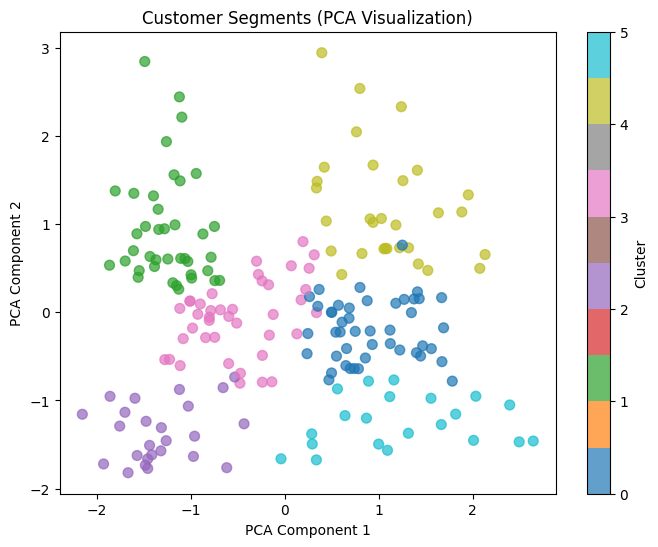

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to dataframe
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='tab10', s=50, alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments (PCA Visualization)")
plt.colorbar(label="Cluster")
plt.show()


# Insights
**Cluster 0 (Blue):** These customers have low values on both PCA components, forming a dense group in the bottom-left quadrant.

**Cluster 1 (Orange):** This is a smaller, somewhat spread-out group located mostly at the bottom-left, overlapping with Cluster 0.

**Cluster 2 (Green):** This is a well-defined group with high values on PCA Component 2 and moderate negative values on PCA Component 1, located in the upper-left quadrant.

**Cluster 3 (Brown):** This cluster is more horizontally dispersed, with a wide range of values for PCA Component 1, mostly located in the middle of the plot.

**Cluster 4 (Yellow):** This group is located in the upper-right quadrant, showing high values on both PCA components.

**Cluster 5 (Teal):** This cluster is quite spread out in the bottom-right quadrant, with a wide range of values on both PCA components, particularly PCA Component 1.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


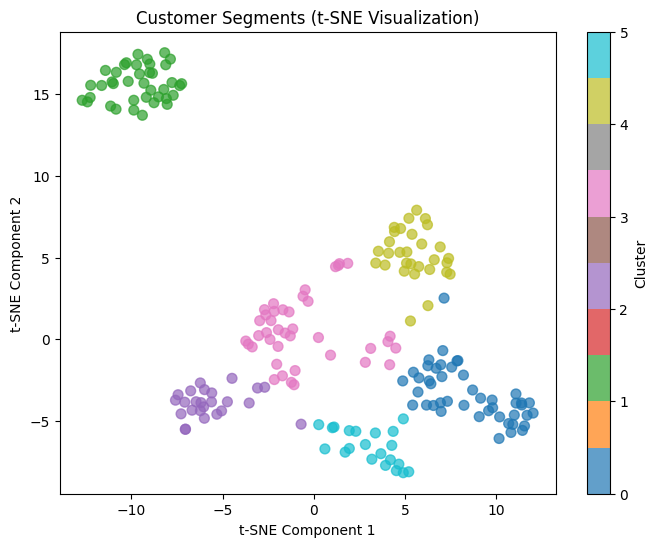

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE (2 components for visualization)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE components to dataframe
df['TSNE1'] = X_tsne[:,0]
df['TSNE2'] = X_tsne[:,1]

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(df['TSNE1'], df['TSNE2'], c=df['Cluster'], cmap='tab10', s=50, alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Customer Segments (t-SNE Visualization)")
plt.colorbar(label="Cluster")
plt.show()


# Insights

**Effective Clustering:** The plot shows that the clustering algorithm was highly successful. The six distinct customer clusters, represented by different colors, are very well-separated with little to no overlap, indicating that the customers within each group are highly similar to each other and different from those in other groups.

**Cluster Density:** The plot reveals the internal compactness of each cluster. Clusters such as **Cluster 2 (green)** and **Cluster 4 (yellow)** are very tight and dense, suggesting that customers within these groups share extremely similar characteristics. In contrast, clusters like **Cluster 0 (blue)** and **Cluster 5 (teal**) are more spread out, which indicates a greater degree of variance among the customers within those segments.

# Marketing Strategies by Segment (k = 6)

**Cluster 0 — “Practical Boomers”**

**Profile:** Older (≈56), mid income (~54k), moderate spend ~49

**Goal:** Maintain engagement; nudge basket size up

**Tactics:**

Value bundles on everyday/lifestyle products

Senior/member discounts; simple loyalty program perks

Clear, low-friction offers (SMS, WhatsApp, in-store signage)

**KPIs:** Repeat rate, avg. order value (AOV), coupon redemption


**Cluster 1 — “Affluent Enthusiasts”**

**Profile:** Young adults (≈33), high income (~87k), very high spend ~82

**Goal:** Maximize lifetime value; premium upsell

**Tactics:**

Early access, exclusives, concierge-style service

Personalized recommendations; premium memberships

Social/Instagram/Influencer collaborations, limited drops

**KPIs:** Premium attach rate, CLV, referral rate

**Cluster 2 — “Trendy on a Budget”**

**Profile:** Very young (≈26), low income (~26k), high spend ~76

**Goal:** Sustain frequency with affordable excitement

**Tactics:**

Flash sales, student pricing, BNPL/EMI options

Trend-driven merchandising, gamified rewards (points/streaks)

App push + TikTok/IG Reels; creator-led micro-campaigns

**KPIs:** Purchase frequency, promo response, app engagement

**Cluster 3 — “Mid-Market Moderates”**

**Profile:** Young (≈26), mid income (~59k), moderate spend ~44k
   
**Goal:** Lift spend per visit; move to higher tiers

**Tactics:**

Tiered loyalty (unlock perks with small step-ups)

Cross-sell/upsell at checkout; smart bundles

Email journeys with “complete the look/kit” prompts

**KPIs:** AOV, tier upgrades, cross-sell rate

**Cluster 4 — “Wealthy Minimalists”**

**Profile:** Middle-aged (≈44), high income (~90k), very low spend ~18

**Goal:** Activate and convert high potential

**Tactics:**

VIP intro offers, invite-only events, white-glove trials

Problem/quality messaging over price; risk-free returns

1:1 outreach (account manager), LinkedIn/quality lifestyle media

**KPIs:** Reactivation rate, first-to-second purchase conversion, premium sku penetration

**Cluster 5 — “Value-First Savers”**

**Profile:** Middle-aged (≈46), low income (~26k), very low spend ~19

**Goal:** Drive occasional, price-led conversions

**Tactics:**

Essentials/value packs, weekly deals, coupon ladders

Price alerts, WhatsApp/SMS promos, in-store bargain zones

Clear “best price today” messaging

**KPIs:** Deal redemption, visit-to-purchase rate, margin per order

# Portfolio-Level Actions

**Channel mix:** Premium (Clusters 1 & 4) → email/personalization/concierge; Price-led (2 & 5) → push/SMS and promos; Mid (0 & 3) → loyalty + cross-sell.

**Offer architecture:** Keep distinct promo calendars so high-value segments don’t anchor on discounts.

**Measurement:** Track segment-wise CLV, AOV, purchase frequency, and migration between segments over time.